In [74]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import plotly.graph_objects as go
import plotly.offline as pyo
from pathlib import Path

#Request for the json file of the defenders' data -> obtained on postman and adapting the url to increase the limit and get all players data
#Also we filtered only the forwards with over 20 matches and normalized the stats by 90 minutes played to each player in order to compare properly
#We had to split the requests in 2 parts because the limit of the API is 100 per request

url = "https://api.sofascore.com/api/v1/unique-tournament/325/season/27591/statistics?limit=100&order=-rating&accumulation=per90&fields=goals%2Cassists%2CgoalConversionPercentage%2CbigChancesCreated%2CsuccessfulDribblesPercentage%2CbigChancesMissed&filters=appearances.GT.20%2Cposition.in.F"

payload={}
headers = {
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:83.0) Gecko/20100101 Firefox/83.0',
  'Accept': '*/*',
  'Accept-Language': 'pt-BR,pt;q=0.8,en-US;q=0.5,en;q=0.3',
  'Referer': 'https://www.sofascore.com/tournament/football/brazil/brasileiro-serie-a/325',
  'Origin': 'https://www.sofascore.com',
  'Connection': 'keep-alive',
  'TE': 'Trailers',
  'Cookie': '__cfduid=d9abe87eb214a7e6080a15fbdbd7055c01619186545'
}

r1 = requests.get(url, headers = headers)
f_data = r1.json()
df_f1 = pd.json_normalize(f_data['results'])
df_f1.head(100)

,goals,assists,goalConversionPercentage,bigChancesCreated,successfulDribblesPercentage,bigChancesMissed,player.name,player.slug,player.userCount,player.id,team.name,team.slug,team.shortName,team.userCount,team.type,team.id,team.teamColors.primary,team.teamColors.secondary,team.teamColors.text
0,0.71,0.29,18.09,0.25,56.10,0.13,Marinho,marinho,4202,798127,Santos,santos,Santos,0,0,1968,#52b030,#52b030,#ffffff
1,0.13,0.17,7.69,0.33,78.79,0.21,Nikão,nikao,303,139300,Athletico Paranaense,athletico-paranaense,Athletico Paranaense,0,0,1967,#52b030,#52b030,#ffffff
2,0.64,0.11,26.87,0.11,60.47,0.32,Luciano,luciano,2752,282557,São Paulo,sao-paulo,São Paulo,0,0,1981,#52b030,#52b030,#ffffff
3,0.58,0.13,24.53,0.18,60.00,0.18,Diego Souza,diego-souza,1150,17880,Grêmio,gremio,Grêmio,0,0,5926,#52b030,#52b030,#ffffff
4,0.82,0.24,23.94,0.43,44.12,0.34,Thiago Galhardo,thiago-galhardo,2313,165677,Internacional,internacional,Internacional,0,0,1966,#52b030,#52b030,#ffffff
5,0.19,0.24,12.12,0.38,58.62,0.19,Yeferson Soteldo,yeferson-soteldo,2553,789960,Santos,santos,Santos,0,0,1968,#52b030,#52b030,#ffffff
6,0.53,0.00,20.83,0.05,30.77,0.42,Fernandão,fernandao,236,329251,Goiás,goias,Goiás,0,0,1960,#52b030,#52b030,#ffffff
7,0.58,0.17,35.71,0.12,83.33,0.29,Luiz Adriano,luiz-adriano,1101,39438,Palmeiras,palmeiras,Palmeiras,0,0,1963,#52b030,#52b030,#ffffff
8,0.51,0.14,16.42,0.05,51.61,0.47,Brenner,brenner,2069,884980,São Paulo,sao-paulo,São Paulo,0,0,1981,#52b030,#52b030,#ffffff
9,0.35,0.08,10.11,0.12,63.33,0.35,Gilberto,gilberto,710,158561,Bahia,bahia,Bahia,0,0,1955,#52b030,#52b030,#ffffff


In [75]:
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import plotly.graph_objects as go
import plotly.offline as pyo
from pathlib import Path

#Request for the json file of the defenders' data -> obtained on postman and adapting the url to increase the limit and get all players data
#Also we filtered only the forwards with over 20 matches and normalized the stats by 90 minutes played to each player in order to compare properly
#We had to split the requests in 2 parts because the limit of the API is 100 per request

url = "https://api.sofascore.com/api/v1/unique-tournament/325/season/27591/statistics?limit=100&order=-rating&accumulation=per90&fields=goalsFromInsideTheBox%2CgoalsFromOutsideTheBox%2CheadedGoals%2CleftFootGoals%2CrightFootGoals%2Coffsides&filters=appearances.GT.20%2Cposition.in.F"

payload={}
headers = {
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:83.0) Gecko/20100101 Firefox/83.0',
  'Accept': '*/*',
  'Accept-Language': 'pt-BR,pt;q=0.8,en-US;q=0.5,en;q=0.3',
  'Referer': 'https://www.sofascore.com/tournament/football/brazil/brasileiro-serie-a/325',
  'Origin': 'https://www.sofascore.com',
  'Connection': 'keep-alive',
  'TE': 'Trailers',
  'Cookie': '__cfduid=d9abe87eb214a7e6080a15fbdbd7055c01619186545'
}

r3 = requests.get(url, headers = headers)
f_data = r3.json()
df_f2 = pd.json_normalize(f_data['results'])
df_f2

,goalsFromInsideTheBox,goalsFromOutsideTheBox,headedGoals,leftFootGoals,rightFootGoals,offsides,player.name,player.slug,player.userCount,player.id,team.name,team.slug,team.shortName,team.userCount,team.type,team.id,team.teamColors.primary,team.teamColors.secondary,team.teamColors.text
0,0.50,0.21,0.00,0.71,0.00,0.92,Marinho,marinho,4202,798127,Santos,santos,Santos,0,0,1968,#52b030,#52b030,#ffffff
1,0.04,0.08,0.00,0.08,0.04,0.46,Nikão,nikao,303,139300,Athletico Paranaense,athletico-paranaense,Athletico Paranaense,0,0,1967,#52b030,#52b030,#ffffff
2,0.61,0.04,0.14,0.43,0.07,0.32,Luciano,luciano,2752,282557,São Paulo,sao-paulo,São Paulo,0,0,1981,#52b030,#52b030,#ffffff
3,0.49,0.09,0.22,0.00,0.36,0.13,Diego Souza,diego-souza,1150,17880,Grêmio,gremio,Grêmio,0,0,5926,#52b030,#52b030,#ffffff
4,0.82,0.00,0.24,0.10,0.48,0.86,Thiago Galhardo,thiago-galhardo,2313,165677,Internacional,internacional,Internacional,0,0,1966,#52b030,#52b030,#ffffff
5,0.19,0.00,0.00,0.00,0.19,0.19,Yeferson Soteldo,yeferson-soteldo,2553,789960,Santos,santos,Santos,0,0,1968,#52b030,#52b030,#ffffff
6,0.48,0.05,0.21,0.00,0.32,0.42,Fernandão,fernandao,236,329251,Goiás,goias,Goiás,0,0,1960,#52b030,#52b030,#ffffff
7,0.47,0.12,0.12,0.00,0.47,0.06,Luiz Adriano,luiz-adriano,1101,39438,Palmeiras,palmeiras,Palmeiras,0,0,1963,#52b030,#52b030,#ffffff
8,0.51,0.00,0.14,0.14,0.23,0.28,Brenner,brenner,2069,884980,São Paulo,sao-paulo,São Paulo,0,0,1981,#52b030,#52b030,#ffffff
9,0.31,0.04,0.12,0.08,0.15,0.27,Gilberto,gilberto,710,158561,Bahia,bahia,Bahia,0,0,1955,#52b030,#52b030,#ffffff


In [76]:
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib as mpl
import matplotlib.font_manager as font_manager
import plotly.graph_objects as go
import plotly.offline as pyo
from pathlib import Path

#Request for the json file of the defenders' data -> obtained on postman and adapting the url to increase the limit and get all players data
#Also we filtered only the forwards with over 20 matches and normalized the stats by 90 minutes played to each player in order to compare properly
#We had to split the requests in 2 parts because the limit of the API is 100 per request

url = "https://api.sofascore.com/api/v1/unique-tournament/325/season/27591/statistics?limit=100&order=-rating&accumulation=per90&fields=aerialDuelsWon%2CgroundDuelsWon%2CpossessionLost%2CshotsOffTarget%2CshotsOnTarget%2Ctackles&filters=appearances.GT.20%2Cposition.in.F"

payload={}
headers = {
  'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:83.0) Gecko/20100101 Firefox/83.0',
  'Accept': '*/*',
  'Accept-Language': 'pt-BR,pt;q=0.8,en-US;q=0.5,en;q=0.3',
  'Referer': 'https://www.sofascore.com/tournament/football/brazil/brasileiro-serie-a/325',
  'Origin': 'https://www.sofascore.com',
  'Connection': 'keep-alive',
  'TE': 'Trailers',
  'Cookie': '__cfduid=d9abe87eb214a7e6080a15fbdbd7055c01619186545'
}

r3 = requests.get(url, headers = headers)
f_data = r3.json()
df_f3 = pd.json_normalize(f_data['results'])
df_f3

,aerialDuelsWon,groundDuelsWon,possessionLost,shotsOffTarget,shotsOnTarget,tackles,player.name,player.slug,player.userCount,player.id,team.name,team.slug,team.shortName,team.userCount,team.type,team.id,team.teamColors.primary,team.teamColors.secondary,team.teamColors.text
0,0.63,8.14,15.44,1.43,1.59,1.13,Marinho,marinho,4202,798127,Santos,santos,Santos,0,0,1968,#52b030,#52b030,#ffffff
1,0.79,3.85,12.34,0.67,0.67,0.50,Nikão,nikao,303,139300,Athletico Paranaense,athletico-paranaense,Athletico Paranaense,0,0,1967,#52b030,#52b030,#ffffff
2,0.61,4.18,9.48,0.72,1.18,1.11,Luciano,luciano,2752,282557,São Paulo,sao-paulo,São Paulo,0,0,1981,#52b030,#52b030,#ffffff
3,4.59,2.52,9.45,0.76,1.03,0.54,Diego Souza,diego-souza,1150,17880,Grêmio,gremio,Grêmio,0,0,5926,#52b030,#52b030,#ffffff
4,2.16,3.36,12.49,1.10,1.68,0.77,Thiago Galhardo,thiago-galhardo,2313,165677,Internacional,internacional,Internacional,0,0,1966,#52b030,#52b030,#ffffff
5,0.33,5.03,17.31,0.71,0.71,0.33,Yeferson Soteldo,yeferson-soteldo,2553,789960,Santos,santos,Santos,0,0,1968,#52b030,#52b030,#ffffff
6,5.77,2.70,10.96,1.06,1.06,0.58,Fernandão,fernandao,236,329251,Goiás,goias,Goiás,0,0,1960,#52b030,#52b030,#ffffff
7,1.51,2.33,6.76,0.41,1.05,0.35,Luiz Adriano,luiz-adriano,1101,39438,Palmeiras,palmeiras,Palmeiras,0,0,1963,#52b030,#52b030,#ffffff
8,0.65,3.08,5.98,1.17,1.31,0.56,Brenner,brenner,2069,884980,São Paulo,sao-paulo,São Paulo,0,0,1981,#52b030,#52b030,#ffffff
9,2.32,3.21,7.89,1.43,1.43,0.58,Gilberto,gilberto,710,158561,Bahia,bahia,Bahia,0,0,1955,#52b030,#52b030,#ffffff


In [77]:
df_f = df_f1.merge(df_f2, left_on='player.id', right_on='player.id', how = 'inner')
df_f = df_f.merge(df_f3, left_on='player.id', right_on='player.id', how = 'inner')
print(df_f.columns)

Index(['goals', 'assists', 'goalConversionPercentage', 'bigChancesCreated',
       'successfulDribblesPercentage', 'bigChancesMissed', 'player.name_x',
       'player.slug_x', 'player.userCount_x', 'player.id', 'team.name_x',
       'team.slug_x', 'team.shortName_x', 'team.userCount_x', 'team.type_x',
       'team.id_x', 'team.teamColors.primary_x', 'team.teamColors.secondary_x',
       'team.teamColors.text_x', 'goalsFromInsideTheBox',
       'goalsFromOutsideTheBox', 'headedGoals', 'leftFootGoals',
       'rightFootGoals', 'offsides', 'player.name_y', 'player.slug_y',
       'player.userCount_y', 'team.name_y', 'team.slug_y', 'team.shortName_y',
       'team.userCount_y', 'team.type_y', 'team.id_y',
       'team.teamColors.primary_y', 'team.teamColors.secondary_y',
       'team.teamColors.text_y', 'aerialDuelsWon', 'groundDuelsWon',
       'possessionLost', 'shotsOffTarget', 'shotsOnTarget', 'tackles',
       'player.name', 'player.slug', 'player.userCount', 'team.name',
       'team

In [78]:
cols = ['player.slug_x', 'player.userCount_x', 'player.id', 'team.name_x',
       'team.slug_x', 'team.shortName_x', 'team.userCount_x', 'team.type_x',
       'team.id_x', 'team.teamColors.primary_x', 'team.teamColors.secondary_x',
       'team.teamColors.text_x','player.name_y', 'player.slug_y',
       'player.userCount_y', 'team.name_y', 'team.slug_y', 'team.shortName_y',
       'team.userCount_y', 'team.type_y', 'team.id_y',
       'team.teamColors.primary_y', 'team.teamColors.secondary_y',
       'team.teamColors.text_y','player.name', 'player.slug', 'player.userCount',
       'team.slug', 'team.shortName', 'team.userCount', 'team.type', 'team.id',
       'team.teamColors.primary', 'team.teamColors.secondary',
       'team.teamColors.text']
df_f.drop(columns=cols,inplace=True)
df_f

,goals,assists,goalConversionPercentage,bigChancesCreated,successfulDribblesPercentage,bigChancesMissed,player.name_x,goalsFromInsideTheBox,goalsFromOutsideTheBox,headedGoals,leftFootGoals,rightFootGoals,offsides,aerialDuelsWon,groundDuelsWon,possessionLost,shotsOffTarget,shotsOnTarget,tackles,team.name
0,0.71,0.29,18.09,0.25,56.10,0.13,Marinho,0.50,0.21,0.00,0.71,0.00,0.92,0.63,8.14,15.44,1.43,1.59,1.13,Santos
1,0.13,0.17,7.69,0.33,78.79,0.21,Nikão,0.04,0.08,0.00,0.08,0.04,0.46,0.79,3.85,12.34,0.67,0.67,0.50,Athletico Paranaense
2,0.64,0.11,26.87,0.11,60.47,0.32,Luciano,0.61,0.04,0.14,0.43,0.07,0.32,0.61,4.18,9.48,0.72,1.18,1.11,São Paulo
3,0.58,0.13,24.53,0.18,60.00,0.18,Diego Souza,0.49,0.09,0.22,0.00,0.36,0.13,4.59,2.52,9.45,0.76,1.03,0.54,Grêmio
4,0.82,0.24,23.94,0.43,44.12,0.34,Thiago Galhardo,0.82,0.00,0.24,0.10,0.48,0.86,2.16,3.36,12.49,1.10,1.68,0.77,Internacional
5,0.19,0.24,12.12,0.38,58.62,0.19,Yeferson Soteldo,0.19,0.00,0.00,0.00,0.19,0.19,0.33,5.03,17.31,0.71,0.71,0.33,Santos
6,0.53,0.00,20.83,0.05,30.77,0.42,Fernandão,0.48,0.05,0.21,0.00,0.32,0.42,5.77,2.70,10.96,1.06,1.06,0.58,Goiás
7,0.58,0.17,35.71,0.12,83.33,0.29,Luiz Adriano,0.47,0.12,0.12,0.00,0.47,0.06,1.51,2.33,6.76,0.41,1.05,0.35,Palmeiras
8,0.51,0.14,16.42,0.05,51.61,0.47,Brenner,0.51,0.00,0.14,0.14,0.23,0.28,0.65,3.08,5.98,1.17,1.31,0.56,São Paulo
9,0.35,0.08,10.11,0.12,63.33,0.35,Gilberto,0.31,0.04,0.12,0.08,0.15,0.27,2.32,3.21,7.89,1.43,1.43,0.58,Bahia


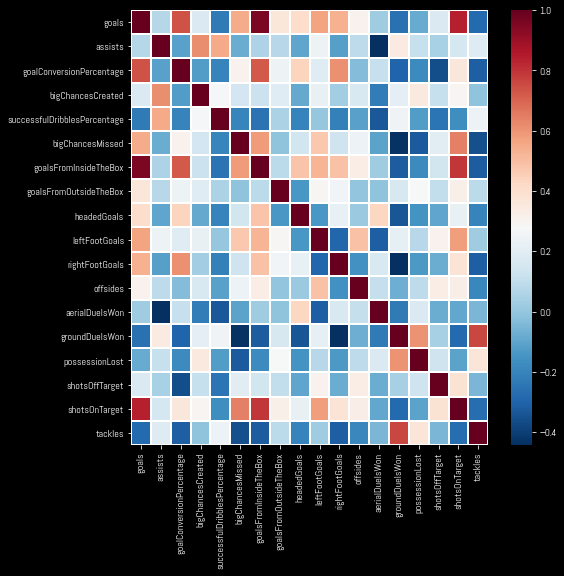

In [79]:
corr_matrix = df_f.corr()
fig,ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_matrix, linewidths=.3, cmap = 'RdBu_r')
fig.savefig('corrmatrixf.png')

In [80]:
df_f = df_f.rename(columns = {'player.name_x':'player', 'team.name_x':'team' })

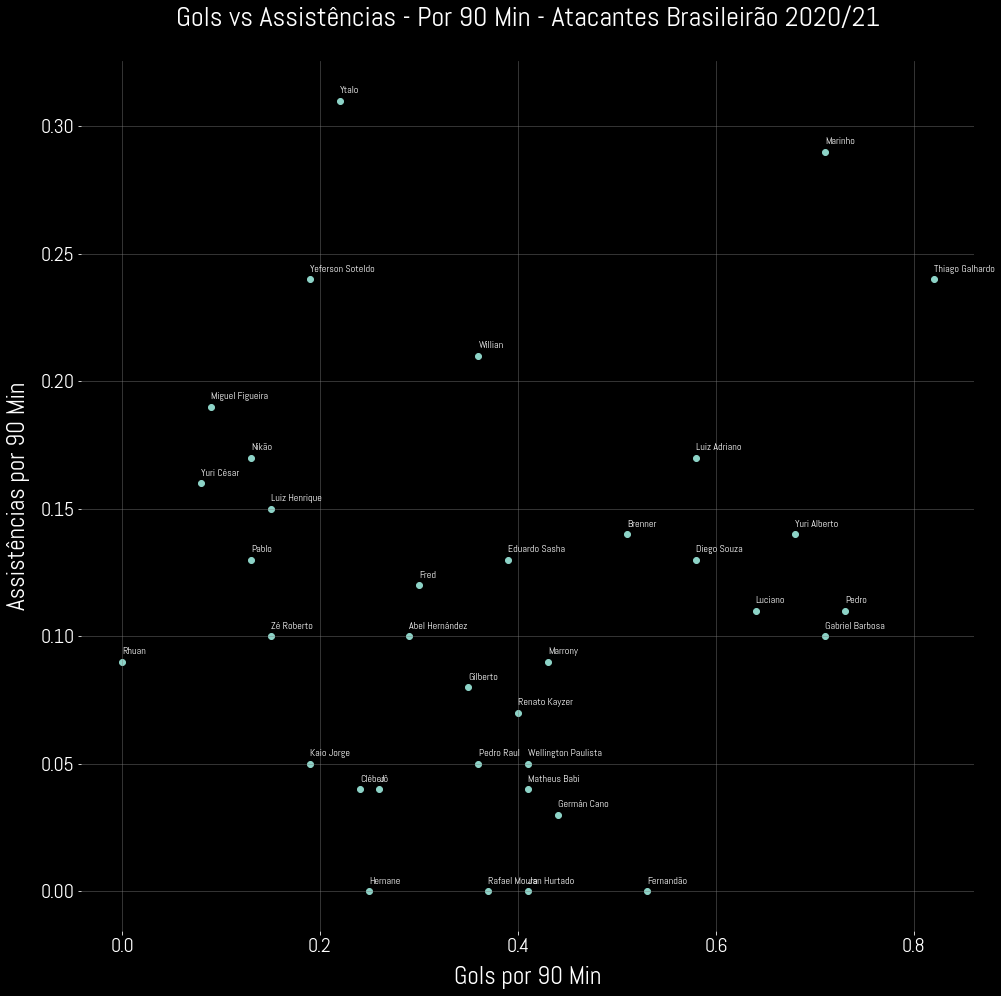

In [81]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_f['goals'],df_f['assists'])

#Annotation on the scatter points
for i in range (df_f.shape[0]):
    plt.text(x=df_f.goals[i] + 0.0002,
             y=df_f.assists[i] + 0.003,
             s = df_f.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'Gols vs Assistências - Por 90 Min - Atacantes Brasileirão 2020/21',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='Gols por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Assistências por 90 Min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('GolsvsAssists.png')

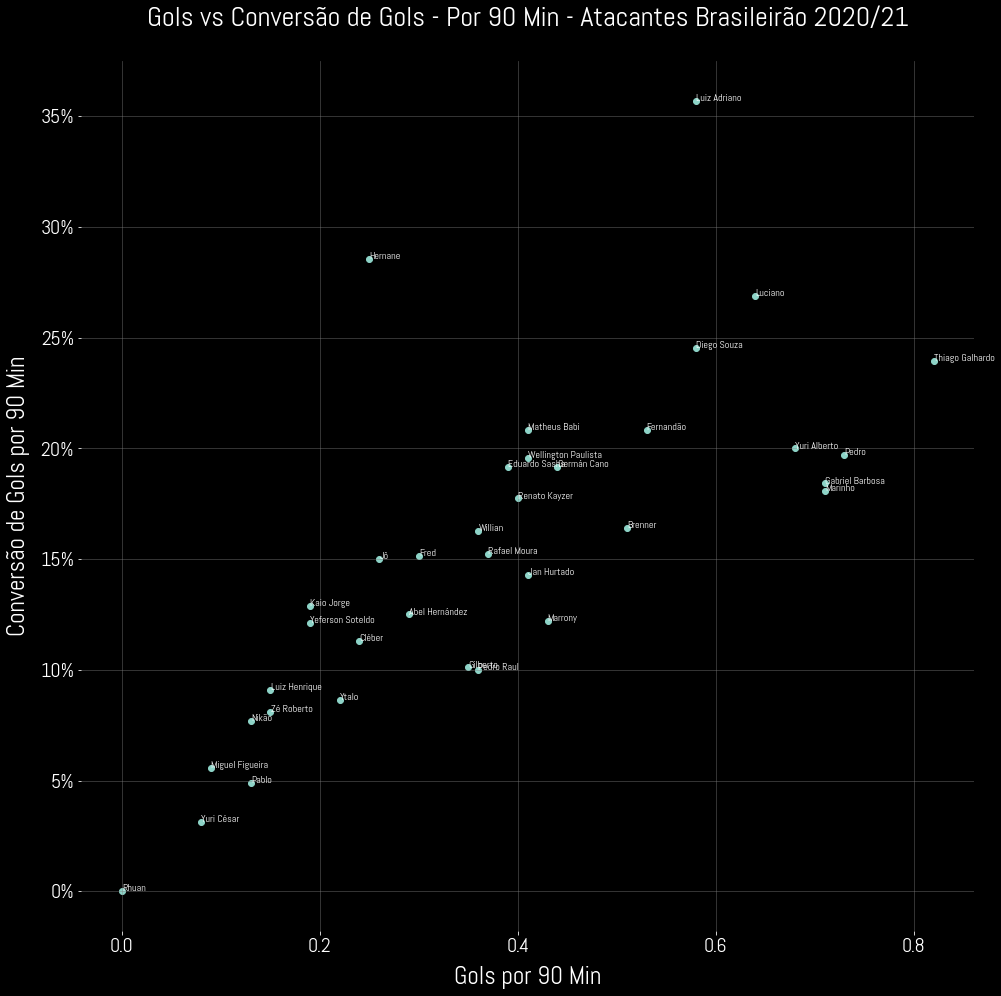

In [82]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_f['goals'],df_f['goalConversionPercentage'])

#Annotation on the scatter points
for i in range (df_f.shape[0]):
    plt.text(x=df_f.goals[i] + 0.0002,
             y=df_f.goalConversionPercentage[i] + 0.003,
             s = df_f.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'Gols vs Conversão de Gols - Por 90 Min - Atacantes Brasileirão 2020/21',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='Gols por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Conversão de Gols por 90 Min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('GolsvsConversaoGols.png')

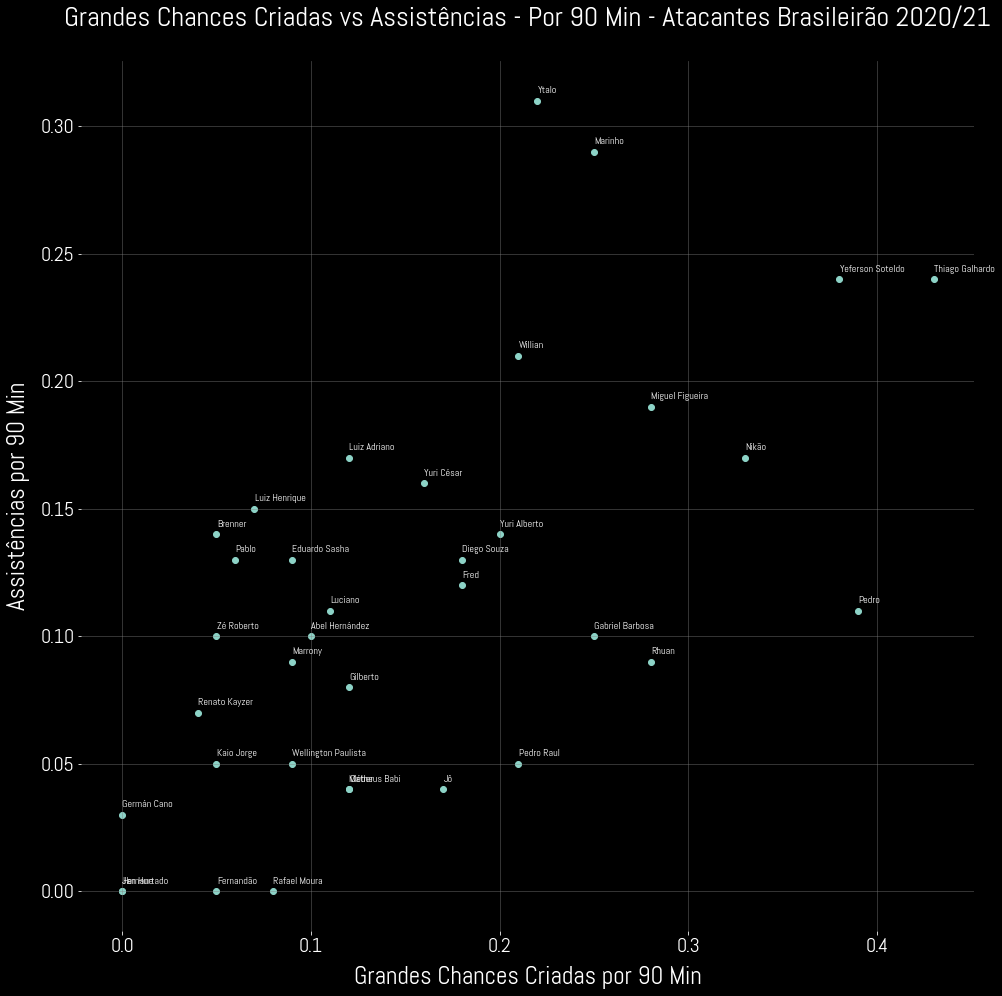

In [83]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_f['bigChancesCreated'],df_f['assists'])

#Annotation on the scatter points
for i in range (df_f.shape[0]):
    plt.text(x=df_f.bigChancesCreated[i] + 0.0002,
             y=df_f.assists[i] + 0.003,
             s = df_f.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'Grandes Chances Criadas vs Assistências - Por 90 Min - Atacantes Brasileirão 2020/21',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='Grandes Chances Criadas por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Assistências por 90 Min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('GrandesChancesCriadasvsAssists.png')

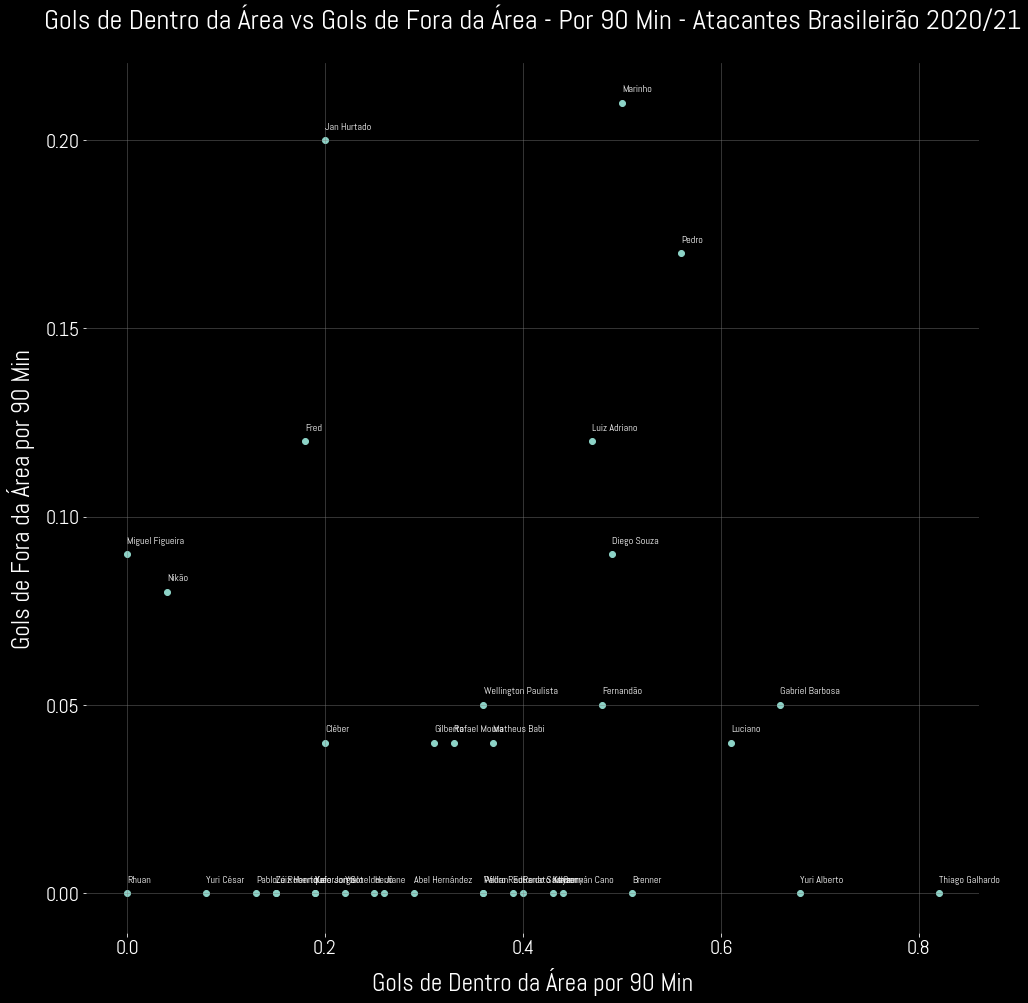

In [84]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_f['goalsFromInsideTheBox'],df_f['goalsFromOutsideTheBox'])

#Annotation on the scatter points
for i in range (df_f.shape[0]):
    plt.text(x=df_f.goalsFromInsideTheBox[i] + 0.0002,
             y=df_f.goalsFromOutsideTheBox[i] + 0.003,
             s = df_f.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'Gols de Dentro da Área vs Gols de Fora da Área - Por 90 Min - Atacantes Brasileirão 2020/21',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='Gols de Dentro da Área por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Gols de Fora da Área por 90 Min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('GolsDentrovsGolsFora.png')

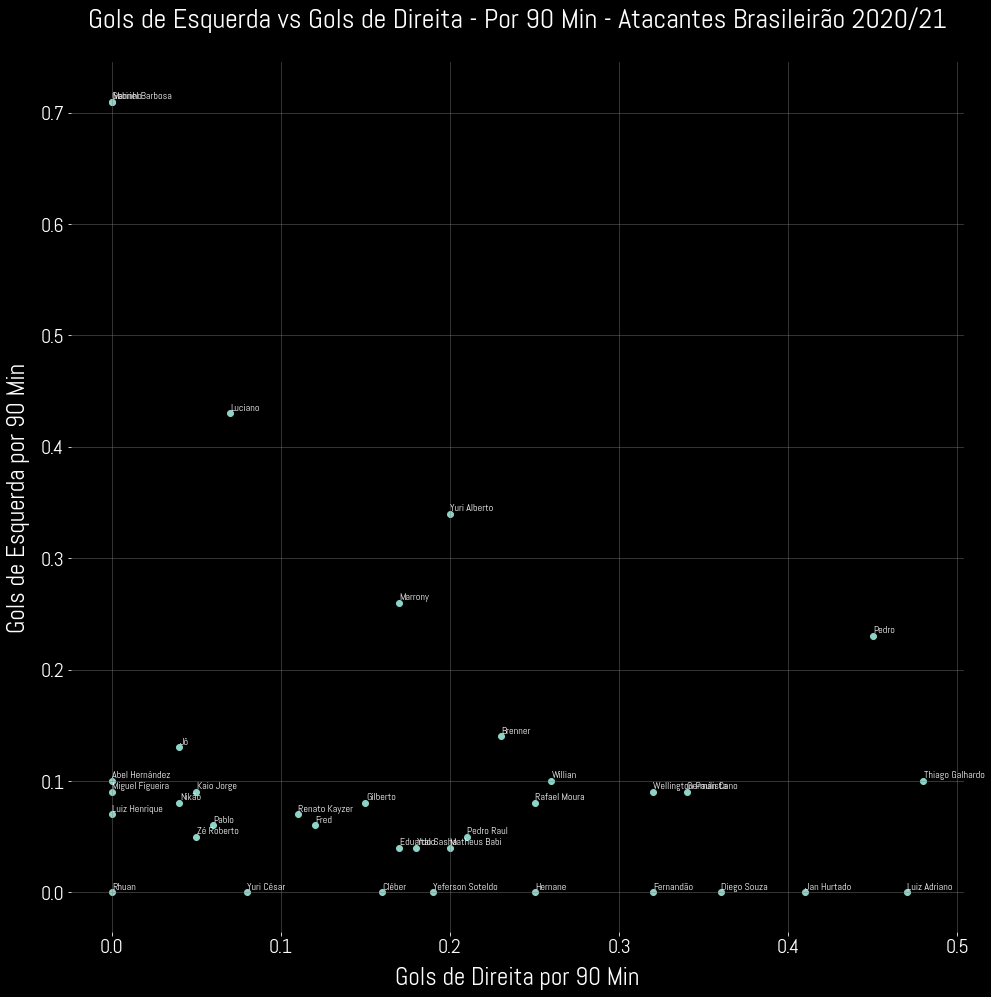

In [85]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_f['rightFootGoals'],df_f['leftFootGoals'])

#Annotation on the scatter points
for i in range (df_f.shape[0]):
    plt.text(x=df_f.rightFootGoals[i] + 0.0002,
             y=df_f.leftFootGoals[i] + 0.003,
             s = df_f.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'Gols de Esquerda vs Gols de Direita - Por 90 Min - Atacantes Brasileirão 2020/21',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='Gols de Direita por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Gols de Esquerda por 90 Min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('GolsEsquerdavsGolsDireita.png')

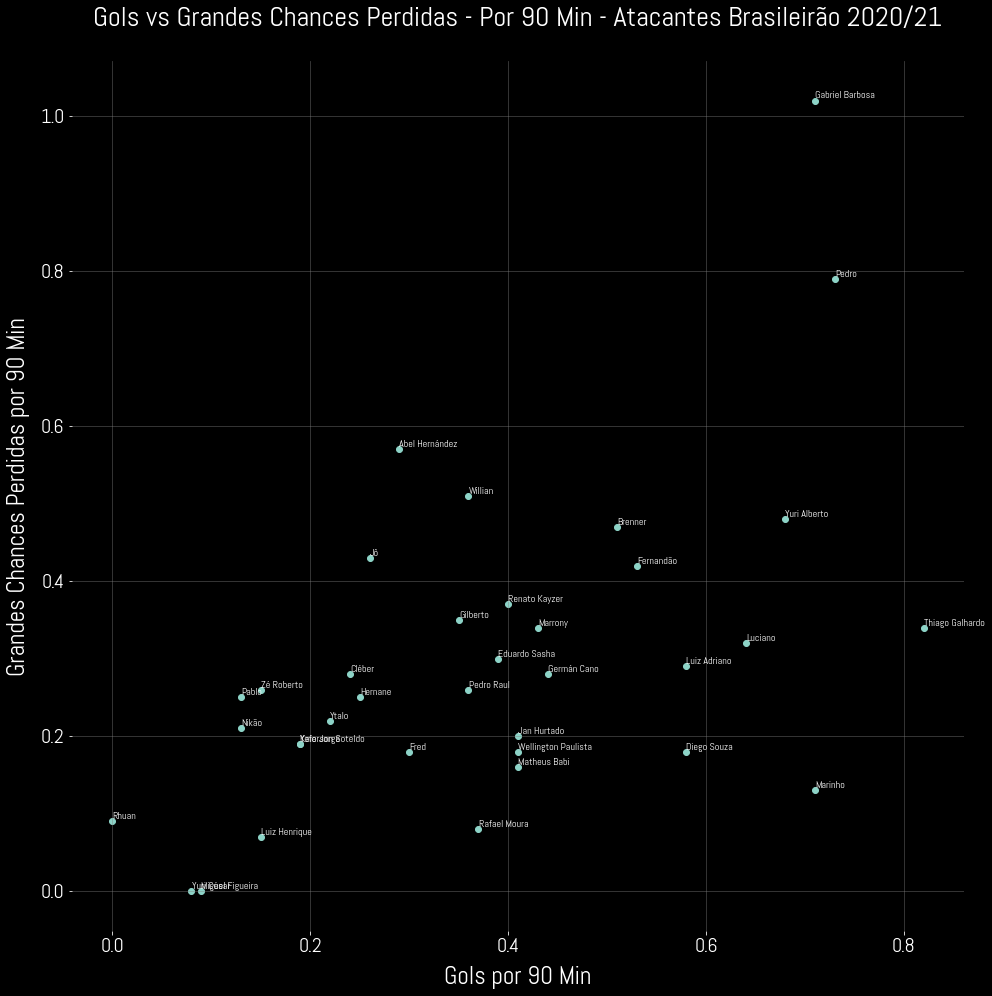

In [86]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_f['goals'],df_f['bigChancesMissed'])

#Annotation on the scatter points
for i in range (df_f.shape[0]):
    plt.text(x=df_f.goals[i] + 0.0002,
             y=df_f.bigChancesMissed[i] + 0.003,
             s = df_f.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'Gols vs Grandes Chances Perdidas - Por 90 Min - Atacantes Brasileirão 2020/21',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='Gols por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Grandes Chances Perdidas por 90 Min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('GolsvsGrandesChancesPerdidas.png')

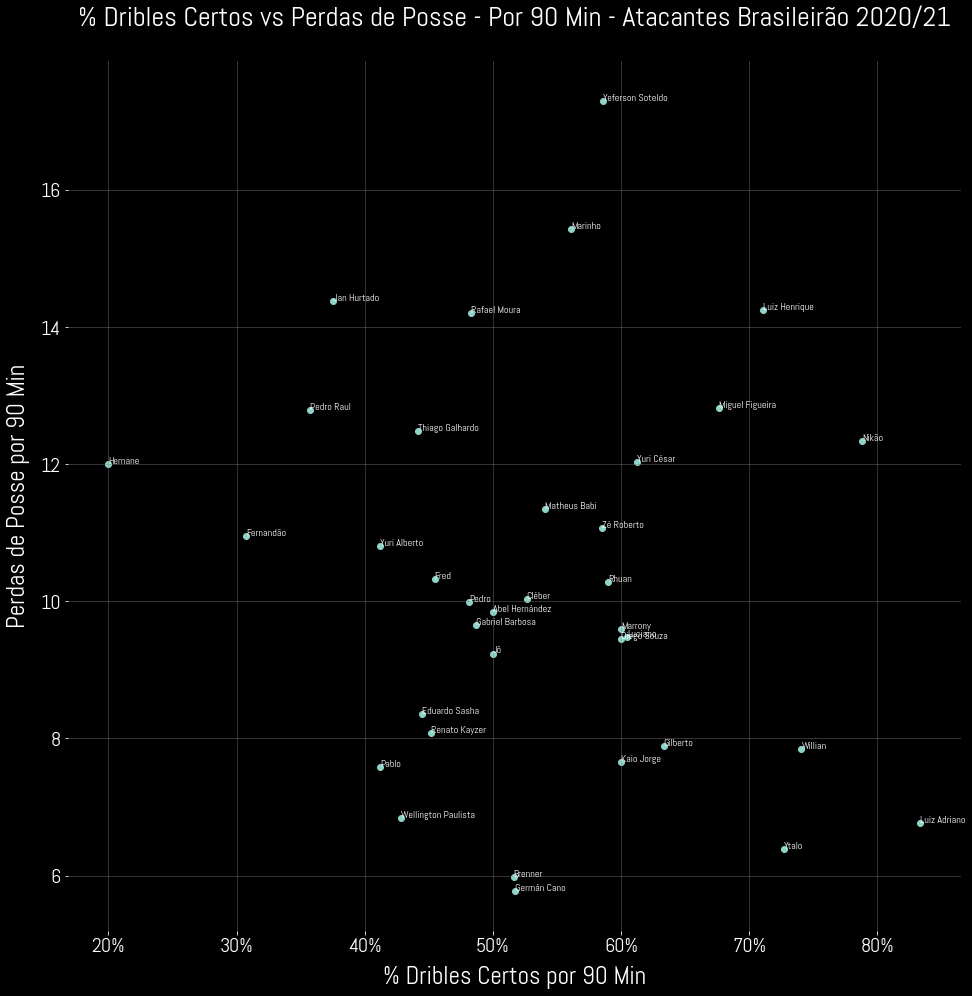

In [87]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_f['successfulDribblesPercentage'],df_f['possessionLost'])

#Annotation on the scatter points
for i in range (df_f.shape[0]):
    plt.text(x=df_f.successfulDribblesPercentage[i] + 0.0002,
             y=df_f.possessionLost[i] + 0.003,
             s = df_f.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'% Dribles Certos vs Perdas de Posse - Por 90 Min - Atacantes Brasileirão 2020/21',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='% Dribles Certos por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Perdas de Posse por 90 Min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('DriblesCertosvsPerdasdePosse.png')

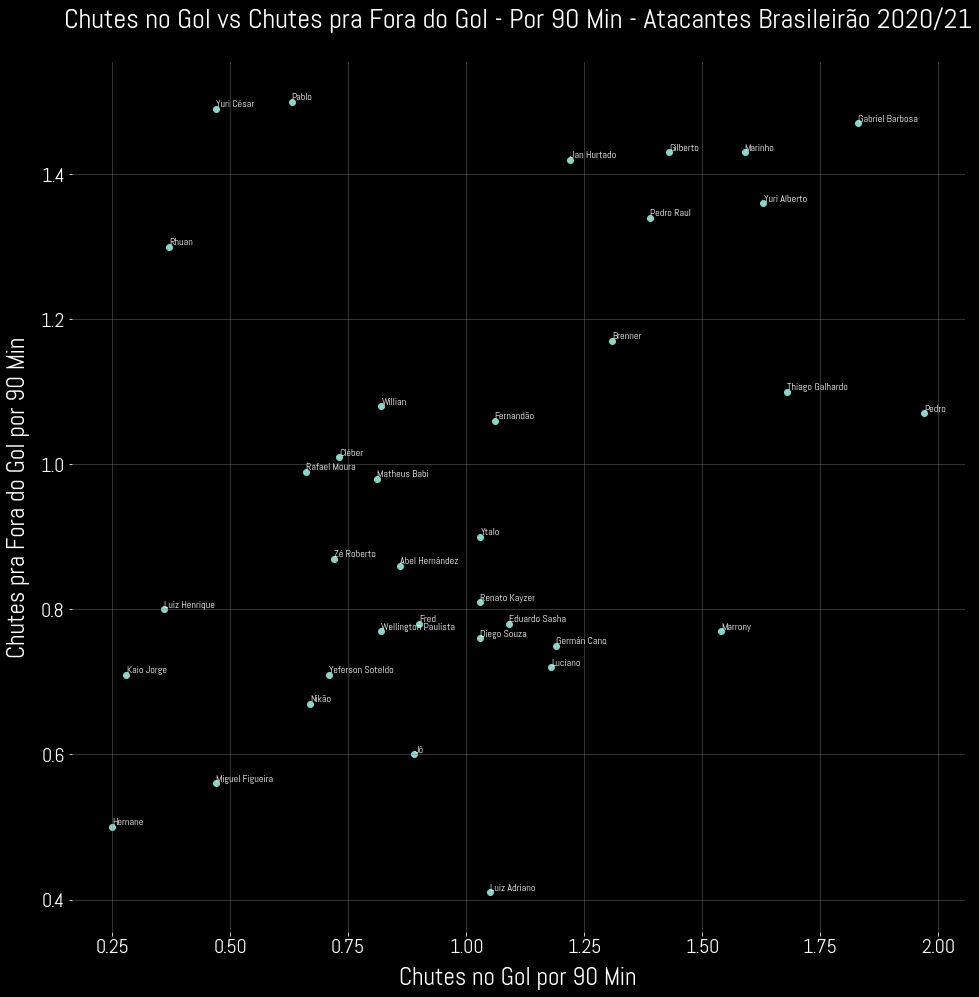

In [88]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_f['shotsOnTarget'],df_f['shotsOffTarget'])

#Annotation on the scatter points
for i in range (df_f.shape[0]):
    plt.text(x=df_f.shotsOnTarget[i] + 0.0002,
             y=df_f.shotsOffTarget[i] + 0.003,
             s = df_f.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'Chutes no Gol vs Chutes pra Fora do Gol - Por 90 Min - Atacantes Brasileirão 2020/21',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='Chutes no Gol por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Chutes pra Fora do Gol por 90 Min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('ChutesnoGolvsChutesPraFora.png')

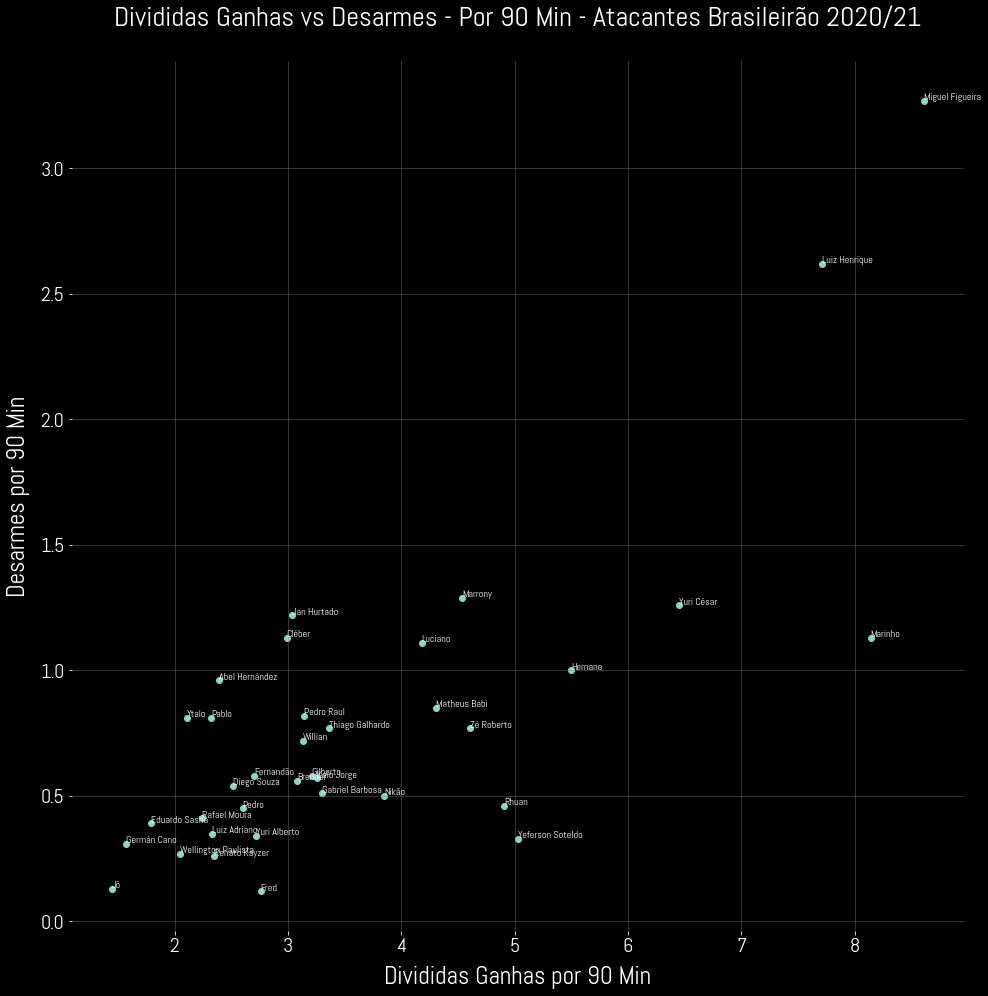

In [89]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_f['groundDuelsWon'],df_f['tackles'])

#Annotation on the scatter points
for i in range (df_f.shape[0]):
    plt.text(x=df_f.groundDuelsWon[i] + 0.0002,
             y=df_f.tackles[i] + 0.003,
             s = df_f.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'Divididas Ganhas vs Desarmes - Por 90 Min - Atacantes Brasileirão 2020/21',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='Divididas Ganhas por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Desarmes por 90 Min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('DivididasGanhasvsDesarmes.png')

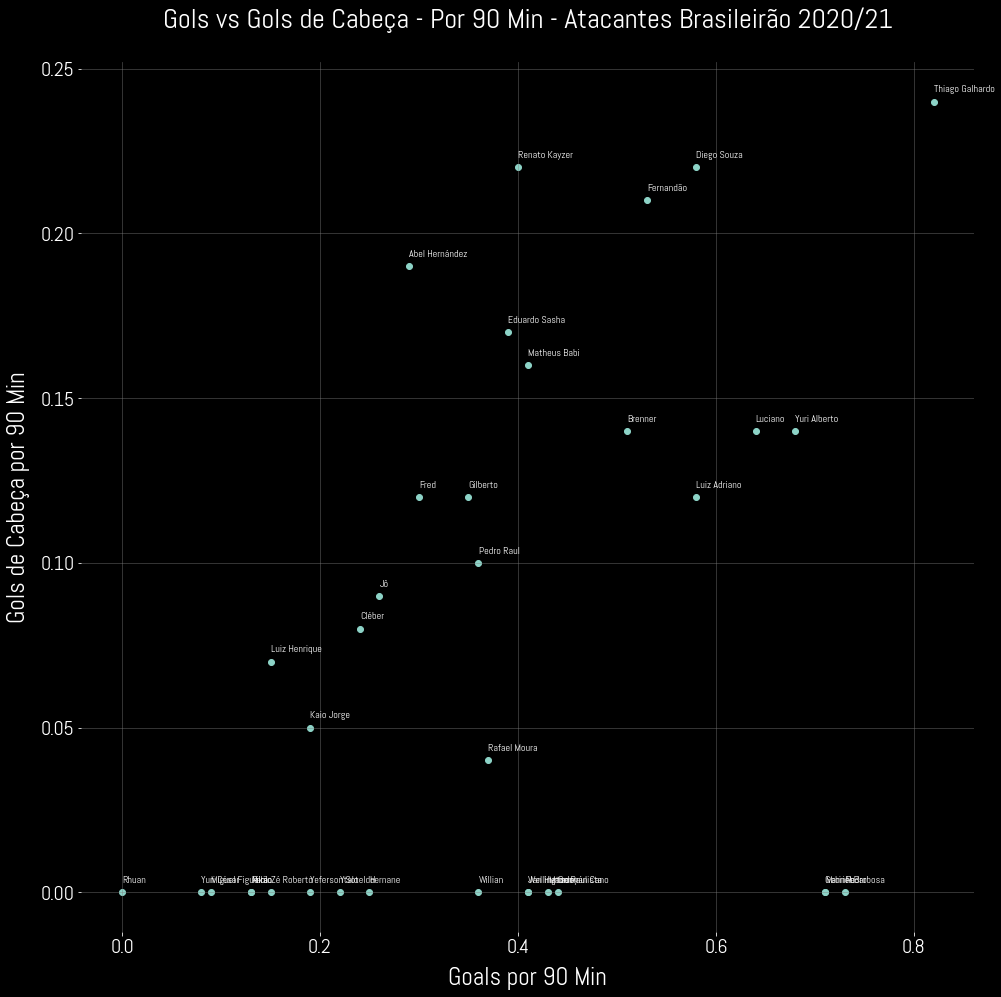

In [90]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_f['goals'],df_f['headedGoals'])

#Annotation on the scatter points
for i in range (df_f.shape[0]):
    plt.text(x=df_f.goals[i] + 0.0002,
             y=df_f.headedGoals[i] + 0.003,
             s = df_f.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'Gols vs Gols de Cabeça - Por 90 Min - Atacantes Brasileirão 2020/21',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='Goals por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Gols de Cabeça por 90 Min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('GolsvsGolsdeCabeça.png')

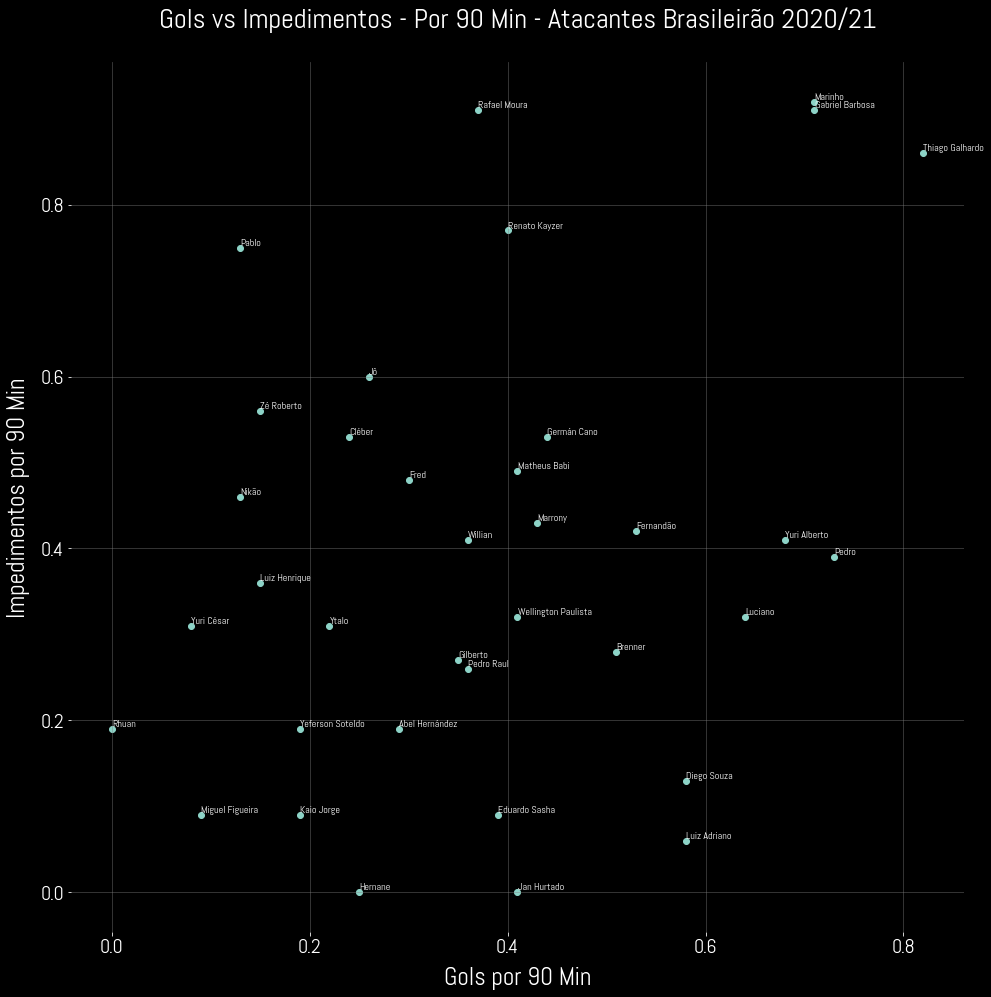

In [91]:
#Defining style and properties
plt.style.use('dark_background')
plt.rc('font', family='Abel')
fig,ax = plt.subplots(figsize=(16,16))
fpath = Path(mpl.get_data_path(), "fonts/ttf/Merriweather-Regular.ttf")

#Defining the scatter
plt.scatter(df_f['goals'],df_f['offsides'])

#Annotation on the scatter points
for i in range (df_f.shape[0]):
    plt.text(x=df_f.goals[i] + 0.0002,
             y=df_f.offsides[i] + 0.003,
             s = df_f.player[i])
    
#Grid and axis properties
plt.grid(alpha = 0.5, color = 'gray')
sns.despine(left = True, bottom = True)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#ax.xaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals = 0))

#Texts
plt.title(f'Gols vs Impedimentos - Por 90 Min - Atacantes Brasileirão 2020/21',
          fontsize = 28, pad = 35)
plt.xlabel(xlabel='Gols por 90 Min', fontsize = 25, labelpad = 10)
plt.ylabel(ylabel='Impedimentos por 90 Min', fontsize = 25, labelpad = 10)

#Showing the plot
plt.show()

#Saving
fig.savefig('GolsvsImpedimentos.png')

In [92]:
labelsat1=['player','goals','assists','bigChancesCreated','bigChancesMissed']
labelsat2=['player','shotsOffTarget','shotsOnTarget','offsides','tackles']
labelsat3=['player','goalsFromInsideTheBox','goalsFromOutsideTheBox','headedGoals','leftFootGoals','rightFootGoals']


df_at = df_f[(df_f['player'] == 'Gabriel Barbosa')
                                | (df_f['player'] == 'Marinho')
                                | (df_f['player'] == 'Thiago Galhardo')].reset_index(drop=True)
df_at_vw1 = df_at[labelsat1]
df_at_vw2 = df_at[labelsat2]    
df_at_vw3 = df_at[labelsat3]        

df_at = df_f[(df_f['player'] == 'Pedro')
                                | (df_f['player'] == 'Luiz Adriano')
                                | (df_f['player'] == 'Luciano')].reset_index(drop=True)
df_at2_vw1 = df_at[labelsat1]
df_at2_vw2 = df_at[labelsat2]    
df_at2_vw3 = df_at[labelsat3]


In [93]:
categories = labelsat1[1:]
categories = [*categories, categories[0]]

players = df_at_vw1.values.tolist()

player_1 = players[0][1:]
player_1 = [*player_1, player_1[0]]
player_2 = players[1][1:]
player_2 = [*player_2, player_2[0]]
player_3 = players[2][1:]
player_3 = [*player_3, player_3[0]]

fig = go.Figure(
    data = [ go.Scatterpolar(r=player_1, theta = categories, name = players[0][0]),
             go.Scatterpolar(r=player_2, theta = categories, name = players[1][0]),
             go.Scatterpolar(r=player_3, theta = categories, name = players[2][0])],
    layout = go.Layout(
    autosize = False,
    width = 700,
    height = 500,
    title=go.layout.Title(text = 'Comparação Atacantes - Visão 1'),
    polar = {'radialaxis':{'visible':True}},
    showlegend = True)
)

pyo.iplot(fig)

In [94]:
categories = labelsat2[1:]
categories = [*categories, categories[0]]

players = df_at_vw2.values.tolist()

player_1 = players[0][1:]
player_1 = [*player_1, player_1[0]]
player_2 = players[1][1:]
player_2 = [*player_2, player_2[0]]
player_3 = players[2][1:]
player_3 = [*player_3, player_3[0]]

fig = go.Figure(
    data = [ go.Scatterpolar(r=player_1, theta = categories, name = players[0][0]),
             go.Scatterpolar(r=player_2, theta = categories, name = players[1][0]),
             go.Scatterpolar(r=player_3, theta = categories, name = players[2][0])],
    layout = go.Layout(
    autosize = False,
    width = 700,
    height = 500,
    title=go.layout.Title(text = 'Comparação Atacantes - Visão 2'),
    polar = {'radialaxis':{'visible':True}},
    showlegend = True)
)

pyo.iplot(fig)

In [95]:
categories = labelsat3[1:]
categories = [*categories, categories[0]]

players = df_at_vw3.values.tolist()

player_1 = players[0][1:]
player_1 = [*player_1, player_1[0]]
player_2 = players[1][1:]
player_2 = [*player_2, player_2[0]]
player_3 = players[2][1:]
player_3 = [*player_3, player_3[0]]

fig = go.Figure(
    data = [ go.Scatterpolar(r=player_1, theta = categories, name = players[0][0]),
             go.Scatterpolar(r=player_2, theta = categories, name = players[1][0]),
             go.Scatterpolar(r=player_3, theta = categories, name = players[2][0])],
    layout = go.Layout(
    autosize = False,
    width = 700,
    height = 500,
    title=go.layout.Title(text = 'Comparação Atacantes - Visão 3'),
    polar = {'radialaxis':{'visible':True}},
    showlegend = True)
)

pyo.iplot(fig)

In [96]:
categories = labelsat1[1:]
categories = [*categories, categories[0]]

players = df_at2_vw1.values.tolist()

player_1 = players[0][1:]
player_1 = [*player_1, player_1[0]]
player_2 = players[1][1:]
player_2 = [*player_2, player_2[0]]
player_3 = players[2][1:]
player_3 = [*player_3, player_3[0]]

fig = go.Figure(
    data = [ go.Scatterpolar(r=player_1, theta = categories, name = players[0][0]),
             go.Scatterpolar(r=player_2, theta = categories, name = players[1][0]),
             go.Scatterpolar(r=player_3, theta = categories, name = players[2][0])],
    layout = go.Layout(
    autosize = False,
    width = 700,
    height = 500,
    title=go.layout.Title(text = 'Comparação Atacantes - Visão 1'),
    polar = {'radialaxis':{'visible':True}},
    showlegend = True)
)

pyo.iplot(fig)

In [97]:
categories = labelsat2[1:]
categories = [*categories, categories[0]]

players = df_at2_vw2.values.tolist()

player_1 = players[0][1:]
player_1 = [*player_1, player_1[0]]
player_2 = players[1][1:]
player_2 = [*player_2, player_2[0]]
player_3 = players[2][1:]
player_3 = [*player_3, player_3[0]]

fig = go.Figure(
    data = [ go.Scatterpolar(r=player_1, theta = categories, name = players[0][0]),
             go.Scatterpolar(r=player_2, theta = categories, name = players[1][0]),
             go.Scatterpolar(r=player_3, theta = categories, name = players[2][0])],
    layout = go.Layout(
    autosize = False,
    width = 700,
    height = 500,
    title=go.layout.Title(text = 'Comparação Atacantes - Visão 2'),
    polar = {'radialaxis':{'visible':True}},
    showlegend = True)
)

pyo.iplot(fig)

In [98]:
categories = labelsat3[1:]
categories = [*categories, categories[0]]

players = df_at2_vw3.values.tolist()

player_1 = players[0][1:]
player_1 = [*player_1, player_1[0]]
player_2 = players[1][1:]
player_2 = [*player_2, player_2[0]]
player_3 = players[2][1:]
player_3 = [*player_3, player_3[0]]

fig = go.Figure(
    data = [ go.Scatterpolar(r=player_1, theta = categories, name = players[0][0]),
             go.Scatterpolar(r=player_2, theta = categories, name = players[1][0]),
             go.Scatterpolar(r=player_3, theta = categories, name = players[2][0])],
    layout = go.Layout(
    autosize = False,
    width = 700,
    height = 500,
    title=go.layout.Title(text = 'Comparação Atacantes - Visão 3'),
    polar = {'radialaxis':{'visible':True}},
    showlegend = True)
)

pyo.iplot(fig)